In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

exps = [
    "gpt-oss-120b_16",
    "gpt-oss-120b_18",
    "gpt-oss-120b_17",
    "gpt-oss-120b_19",
]

titles = [
    "No Long-term Memory",
    "Reflection (1 day)",
    "Reflection (3 days)",
    "Self-reflection (7 days)",
]

data = []

for exp in exps:
    file_path = f"../../experiments/{exp}/people_travel_data_travel_time.jsonl"
    filter_file_path = f"../../experiments/{exp}/people_travel_data.jsonl"

    df = pd.read_json(file_path, lines=True)
    filter_df = pd.read_json(filter_file_path, lines=True)

    all_activities = filter_df['activity_id'].unique()

    df = df[df['activity_id'].isin(all_activities)]

    df = df[df['timestamp'] < datetime.datetime(2025, 3, 29)]

    data.append(df)

data[0].head()


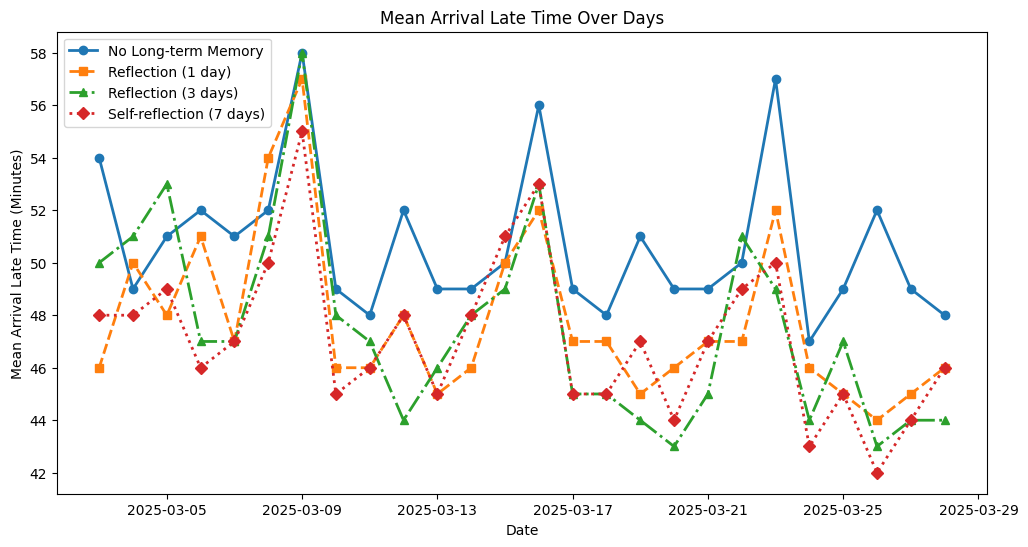

In [14]:
# draw the plot figure, a line for each person
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

markers = ['o', 's', '^', 'D', 'X']
lines = ['-', '--', '-.', ':']
colors = sns.color_palette("tab10", len(titles))

for i, d in enumerate(data):
    late_time_changes = d.groupby(['date']).agg({
        'late': ['mean', 'min', 'max']
    })
    late_time_changes.columns = ['mean_late', 'min_late', 'max_late']
    late_time_changes.reset_index(inplace=True)
    plt.plot(
        late_time_changes['date'], late_time_changes['mean_late'] // 60, label=titles[i], 
        marker=markers[i % len(markers)], linestyle=lines[i % len(lines)], color=colors[i], linewidth=2)

plt.xlabel('Date')
plt.ylabel('Mean Arrival Late Time (Minutes)')
plt.title('Mean Arrival Late Time Over Days')
plt.legend()
plt.show()